In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
train_dataset=pd.read_csv("C:/Users\joseb\Desktop\Langara\DAC Club\Hands On Projects\Bulldozer Price Prediction\Train.csv")
train_dataset.head()
machine_df=pd.read_csv("C:/Users\joseb\Desktop\Langara\DAC Club\Hands On Projects\Bulldozer Price Prediction\Machine_Appendix.csv")

C:\Users\joseb\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Exploratory analysis 

(array([147152., 116065.,  56391.,  31471.,  22014.,  12923.,   8913.,
          3728.,   1941.,    527.]),
 array([  4750.,  18475.,  32200.,  45925.,  59650.,  73375.,  87100.,
        100825., 114550., 128275., 142000.]),
 <a list of 10 Patch objects>)

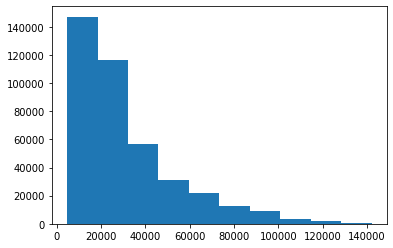

In [2]:
plt.hist(train_dataset["SalePrice"])

In [3]:
train_dataset["SalePrice"].describe()

count    401125.000000
mean      31099.712848
std       23036.898502
min        4750.000000
25%       14500.000000
50%       24000.000000
75%       40000.000000
max      142000.000000
Name: SalePrice, dtype: float64

In [4]:
train_dataset["MachineHoursCurrentMeter"].fillna(0)

0           68.0
1         4640.0
2         2838.0
3         3486.0
4          722.0
           ...  
401120       0.0
401121       0.0
401122       0.0
401123       0.0
401124       0.0
Name: MachineHoursCurrentMeter, Length: 401125, dtype: float64

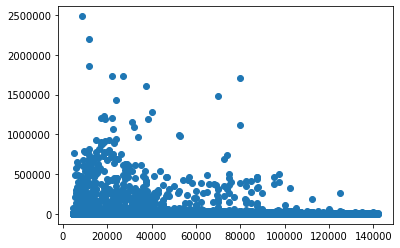

In [5]:
plt.scatter(train_dataset["SalePrice"],train_dataset["MachineHoursCurrentMeter"])

C:\Users\joseb\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\joseb\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.42523e+05, 1.48000e+02, 5.00000e+01, 2.50000e+01, 9.00000e+00,
        3.00000e+00, 4.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([      0.,  248330.,  496660.,  744990.,  993320., 1241650.,
        1489980., 1738310., 1986640., 2234970., 2483300.]),
 <a list of 10 Patch objects>)

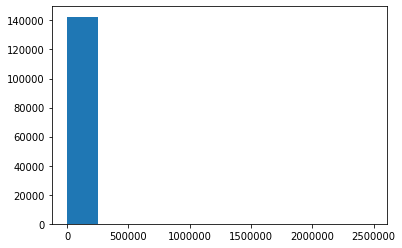

In [6]:
plt.hist(train_dataset["MachineHoursCurrentMeter"],bins=10)

Filter all the rows that contain "YearMade" as 1000 , as this seems to be a missing value

In [7]:
reduced_df=train_dataset[train_dataset["YearMade"]!=1000]
reduced_df.head()


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


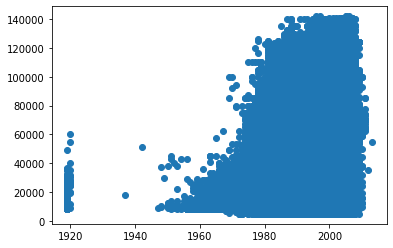

In [8]:
plt.scatter(reduced_df["YearMade"],reduced_df["SalePrice"])


Calculate the correlation between year made with sale price 

In [9]:
reduced_df["SalePrice"].corr(reduced_df["YearMade"],method="pearson")

0.2185600494720288

Linear correlation seems too low to perform regression analysis effectively, however , per the scatterplot there seems to be a relationship between the year bulldozer was made and its selling price. To further explore this , I calculated the mean per year and created a new dataset grouped by year

In [22]:
grouped=pd.DataFrame()
grouped["Average Sale Price"]=reduced_df.groupby(reduced_df["YearMade"])["SalePrice"].mean()
grouped["Year Made"]=sorted(reduced_df["YearMade"].unique())
grouped

,Average Sale Price,Year Made
YearMade,,
1919,17407.480315,1919
1920,29014.705882,1920
1937,18000.000000,1937
1942,51000.000000,1942
1947,9000.000000,1947
...,...,...
2009,48684.464286,2009
2010,49854.000000,2010
2011,71011.111111,2011


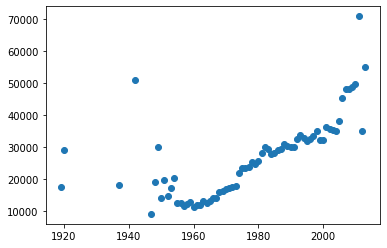

In [23]:
plt.scatter(grouped["Year Made"],grouped["Average Sale Price"])

A more clear linear pattern emerges, with some outliers 

In [12]:
grouped["YearMade"].corr(grouped["SalePrice"],method="pearson")

0.7080642368974844

Correlation , is significantly higher. 

In [16]:
corr_matrix=reduced_df.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice                   1.000000
YearMade                    0.218560
MachineHoursCurrentMeter    0.014122
SalesID                     0.011820
datasource                  0.009337
ModelID                    -0.031217
auctioneerID               -0.043921
MachineID                  -0.220750
Name: SalePrice, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C854D763C8>,
      dtype=object)

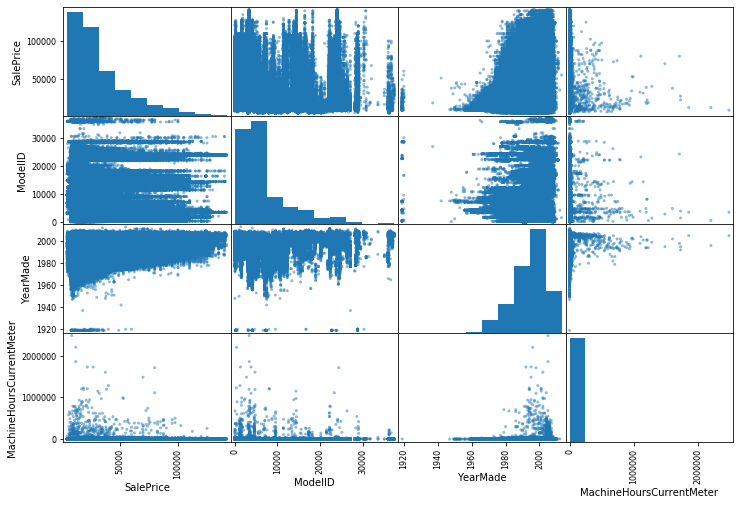

In [18]:
from pandas.plotting import scatter_matrix
attributes=["SalePrice","ModelID","YearMade","MachineHoursCurrentMeter"]
scatter_matrix(reduced_df[attributes],figsize=(12,8))

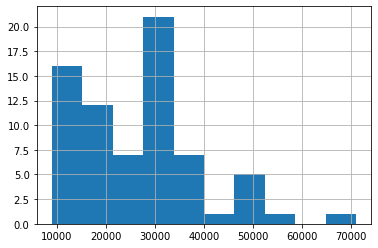

In [19]:
grouped["SalePrice"].hist()

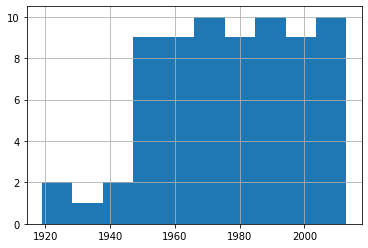

In [20]:
grouped["YearMade"].hist()

Apply log transformation to try and normalize the variables

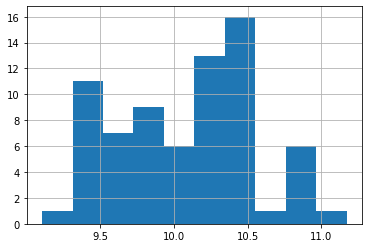

In [26]:
import numpy as np
grouped["Log Avg Sale Price"]=np.log(grouped["Average Sale Price"])
grouped["Log Avg Sale Price"].hist()

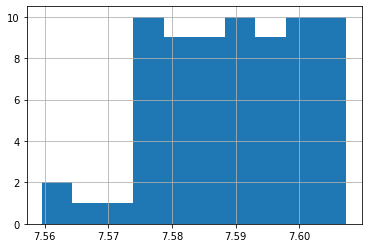

In [27]:
grouped["Log Year Made"]=np.log(grouped["Year Made"])
grouped["Log Year Made"].hist()

# Training and Test set preparation


In [31]:
shuffled_indices=np.random.permutation(len(grouped))
test_set_size=int(len(grouped)*0.3)#Sets aside 30% of the training set values for testing
test_indices=shuffled_indices[:test_set_size]
training_indices=suffled_indices[test_set_size:]
training_set=grouped.iloc[training_indices]
test_set=grouped.iloc[test_indices]
print(len(training_set)," train + ",len(test_set)," test ")

50  train +  21  test 
